In [6]:
import pandas as pd
import numpy as np
df_test=pd.read_csv(r"C:\my_desktop\bigmart_ids\Test.csv")
df_train=pd.read_csv(r"C:\my_desktop\bigmart_ids\Train.csv")
df_tr = pd.concat([df_test, df_train],ignore_index=True)#combinig test and train to handle missing values
df_tr

C:\Users\Prathima\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDW58,107.8622,NaN,Snack Foods,0.007565,20.750,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,reg,FDW14,87.3198,NaN,Dairy,0.038428,8.300,2007,OUT017,Tier 2,NaN,Supermarket Type1
2,Low Fat,NCN55,241.7538,NaN,Others,0.099575,14.600,1998,OUT010,Tier 3,NaN,Grocery Store
3,Low Fat,FDQ58,155.0340,NaN,Snack Foods,0.015388,7.315,2007,OUT017,Tier 2,NaN,Supermarket Type1
4,Regular,FDY38,234.2300,NaN,Dairy,0.118599,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3
5,Regular,FDH56,117.1492,NaN,Fruits and Vegetables,0.063817,9.800,1997,OUT046,Tier 1,Small,Supermarket Type1
6,Regular,FDL48,50.1034,NaN,Baking Goods,0.082602,19.350,2009,OUT018,Tier 3,Medium,Supermarket Type2
7,Low Fat,FDC48,81.0592,NaN,Baking Goods,0.015782,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDN33,95.7436,NaN,Snack Foods,0.123365,6.305,2002,OUT045,Tier 2,NaN,Supermarket Type1
9,Low Fat,FDA36,186.8924,NaN,Baking Goods,0.005698,5.985,2007,OUT017,Tier 2,NaN,Supermarket Type1


In [7]:
# (1) DATA CLEANING
df_tr.isna().sum() #calculating total number of nan values

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [8]:
#Item_Outlet_Sales is the target variable for sales prediction and 39% of its values are NaN
#This attribute is present only in the Test dataset
#So we do not impute teh missing values in this column
tot_nan=2439+4016
percent_nan= tot_nan/(14204*12) * 100
round(percent_nan,2)

3.79

In [9]:
#Imputing Missing Values for Item_Weight
#Since Item_Weight depends on Item_Type, NaNs in Item_Weight is replaced with the mean of Item_Weight values corresponding to
#the respective Item_Type names
lis_it_ty=list(set(df_tr["Item_Type"]))
lis_it_ty #list of Item_Type names

['Baking Goods',
 'Seafood',
 'Others',
 'Canned',
 'Starchy Foods',
 'Breads',
 'Household',
 'Dairy',
 'Hard Drinks',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Meat',
 'Breakfast',
 'Soft Drinks',
 'Health and Hygiene',
 'Snack Foods']

In [10]:
dict_it_ty_wt=dict.fromkeys(lis_it_ty,[])
d1=dict.fromkeys(lis_it_ty,0)
for i in range (0,8523):
    dict_it_ty_wt[df_tr["Item_Type"][i]].append(df_tr["Item_Weight"][i])
dict_it_ty_wt #Dictionary of Item_Type with Item_Type names as keys and list of corresponding Item_Weight values as values

{'Baking Goods': [20.75,
  8.3,
  14.6,
  7.315,
  nan,
  9.8,
  19.35,
  nan,
  6.305,
  5.985,
  16.6,
  6.59,
  nan,
  4.785,
  16.75,
  6.135,
  19.85,
  17.85,
  nan,
  13.6,
  7.1,
  19.2,
  13.65,
  nan,
  19.2,
  6.785,
  13.0,
  5.825,
  13.8,
  12.8,
  nan,
  9.5,
  12.5,
  nan,
  5.78,
  nan,
  nan,
  10.395,
  18.35,
  nan,
  21.1,
  19.75,
  8.43,
  15.35,
  6.71,
  10.195,
  11.65,
  12.85,
  12.15,
  18.25,
  5.98,
  12.65,
  13.1,
  20.7,
  nan,
  7.855,
  13.35,
  17.25,
  nan,
  10.395,
  8.315,
  20.7,
  nan,
  21.35,
  5.88,
  nan,
  7.435,
  14.65,
  14.0,
  18.2,
  17.6,
  nan,
  7.71,
  7.81,
  16.35,
  13.0,
  nan,
  13.35,
  nan,
  16.1,
  17.85,
  5.34,
  5.51,
  6.61,
  6.38,
  16.1,
  13.65,
  19.2,
  8.71,
  17.75,
  19.35,
  nan,
  nan,
  6.44,
  12.6,
  7.935,
  18.25,
  18.5,
  6.035,
  11.8,
  6.26,
  16.5,
  15.7,
  6.635,
  nan,
  nan,
  nan,
  14.0,
  nan,
  17.75,
  17.75,
  8.155,
  17.25,
  nan,
  6.175,
  nan,
  8.18,
  8.355,
  6.905,
  20.35,
 

In [11]:
import statistics
for j in dict_it_ty_wt:
   d1[j]=np.nanmean(dict_it_ty_wt[j])

print(d1) #Dictionay with Item_Type as keys and corresponding mean of Item_Weight as values

{'Baking Goods': 12.794351420093259, 'Seafood': 12.794351420093259, 'Others': 12.794351420093259, 'Canned': 12.794351420093259, 'Starchy Foods': 12.794351420093259, 'Breads': 12.794351420093259, 'Household': 12.794351420093259, 'Dairy': 12.794351420093259, 'Hard Drinks': 12.794351420093259, 'Frozen Foods': 12.794351420093259, 'Fruits and Vegetables': 12.794351420093259, 'Meat': 12.794351420093259, 'Breakfast': 12.794351420093259, 'Soft Drinks': 12.794351420093259, 'Health and Hygiene': 12.794351420093259, 'Snack Foods': 12.794351420093259}


In [12]:
import math
for k in range (0,8523):
    if math.isnan(df_tr["Item_Weight"][k]):
        df_tr["Item_Weight"].replace(to_replace = df_tr["Item_Weight"][k], value =d1[df_tr["Item_Type"][k]],inplace=True) 
        #replacing nan with mean
df_tr["Item_Weight"].isna().sum() #sum of nan after imputing nan values

0

In [13]:
#Imputing Missing Values for Outlet_Size
#Since Outlet_Size depends on Outlet_Type, NaNs in Outlet_Size is replaced with the mode of Outlet_Size values corresponding to
#the respective Outlet_Type names
lis_out_ty=list(set(df_tr["Outlet_Type"]))
lis_out_ty #list of Outlet_Type

['Supermarket Type3',
 'Supermarket Type2',
 'Grocery Store',
 'Supermarket Type1']

In [14]:
dict_out_ty_sz=dict.fromkeys(lis_out_ty,[])
d2=dict.fromkeys(lis_out_ty,0)
for i in range (0,8523):
    dict_out_ty_sz[df_tr["Outlet_Type"][i]].append(df_tr["Outlet_Size"][i])
dict_out_ty_sz
import scipy as stats
df_out_ty_sz=pd.DataFrame(dict_out_ty_sz)
df_out_ty_sz.mode(dropna=True) #calculating the mode of the Outlet_Size corresponding to Outlet_Type

,Supermarket Type3,Supermarket Type2,Grocery Store,Supermarket Type1
0,Medium,Medium,Medium,Medium


In [15]:
import math
df_tr["Outlet_Size"].fillna("Medium",inplace=True) 
df_tr["Outlet_Size"].isna().sum() #nan count after imputing Outlet_Size's nan values

0

In [17]:
df_tr #cleaned dataset

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDW58,107.8622,NaN,Snack Foods,0.007565,20.750000,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,reg,FDW14,87.3198,NaN,Dairy,0.038428,8.300000,2007,OUT017,Tier 2,Medium,Supermarket Type1
2,Low Fat,NCN55,241.7538,NaN,Others,0.099575,14.600000,1998,OUT010,Tier 3,Medium,Grocery Store
3,Low Fat,FDQ58,155.0340,NaN,Snack Foods,0.015388,7.315000,2007,OUT017,Tier 2,Medium,Supermarket Type1
4,Regular,FDY38,234.2300,NaN,Dairy,0.118599,12.794351,1985,OUT027,Tier 3,Medium,Supermarket Type3
5,Regular,FDH56,117.1492,NaN,Fruits and Vegetables,0.063817,9.800000,1997,OUT046,Tier 1,Small,Supermarket Type1
6,Regular,FDL48,50.1034,NaN,Baking Goods,0.082602,19.350000,2009,OUT018,Tier 3,Medium,Supermarket Type2
7,Low Fat,FDC48,81.0592,NaN,Baking Goods,0.015782,12.794351,1985,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDN33,95.7436,NaN,Snack Foods,0.123365,6.305000,2002,OUT045,Tier 2,Medium,Supermarket Type1
9,Low Fat,FDA36,186.8924,NaN,Baking Goods,0.005698,5.985000,2007,OUT017,Tier 2,Medium,Supermarket Type1


In [16]:
df_tr.boxplot(column='Item_Weight', return_type='axes');

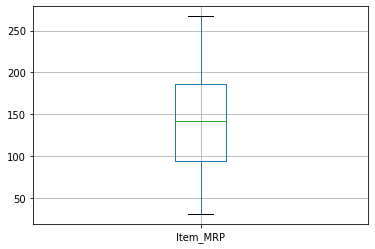

In [17]:
df_tr.boxplot(column='Item_MRP', return_type='axes');

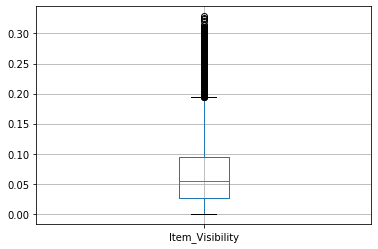

In [18]:
df_tr.boxplot(column='Item_Visibility', return_type='axes');

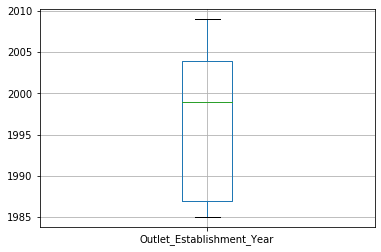

In [19]:
df_tr.boxplot(column='Outlet_Establishment_Year', return_type='axes');

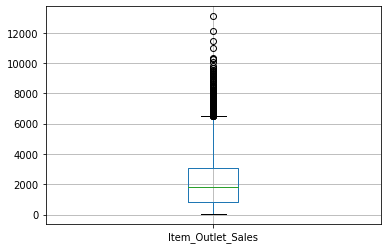

In [20]:
df_tr.boxplot(column='Item_Outlet_Sales', return_type='axes');

In [21]:
# Item_Outlet_Sales, Item_Visibility, Outlet_Establishment_Year seem to have extreme values, but we do not consider them as
# outliers, the explainatoin is given in the ppt

In [23]:
#Change categories of low fat:
print('Original Categories:')
print(df_tr['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
df_tr['Item_Fat_Content'] = df_tr['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print( df_tr['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [28]:
#Determine the years of operation of a store
df_tr['Outlet_Establishment_Year'] = df_tr['Outlet_Establishment_Year'].replace(2013 - df_tr['Outlet_Establishment_Year'])
print(df_tr['Outlet_Establishment_Year'].head(10))

0     9
1     9
2    11
3     9
4     9
5     9
6     9
7     9
8    11
9     9
Name: Outlet_Establishment_Year, dtype: int64


In [29]:
df_tr

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDW58,107.8622,NaN,Snack Foods,0.007565,20.750000,9,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,FDW14,87.3198,NaN,Dairy,0.038428,8.300000,9,OUT017,Tier 2,Medium,Supermarket Type1
2,Low Fat,NCN55,241.7538,NaN,Others,0.099575,14.600000,11,OUT010,Tier 3,Medium,Grocery Store
3,Low Fat,FDQ58,155.0340,NaN,Snack Foods,0.015388,7.315000,9,OUT017,Tier 2,Medium,Supermarket Type1
4,Regular,FDY38,234.2300,NaN,Dairy,0.118599,12.794351,9,OUT027,Tier 3,Medium,Supermarket Type3
5,Regular,FDH56,117.1492,NaN,Fruits and Vegetables,0.063817,9.800000,9,OUT046,Tier 1,Small,Supermarket Type1
6,Regular,FDL48,50.1034,NaN,Baking Goods,0.082602,19.350000,9,OUT018,Tier 3,Medium,Supermarket Type2
7,Low Fat,FDC48,81.0592,NaN,Baking Goods,0.015782,12.794351,9,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDN33,95.7436,NaN,Snack Foods,0.123365,6.305000,11,OUT045,Tier 2,Medium,Supermarket Type1
9,Low Fat,FDA36,186.8924,NaN,Baking Goods,0.005698,5.985000,9,OUT017,Tier 2,Medium,Supermarket Type1


In [30]:
# (2) Normalization and Standardization
df_num = df_tr.select_dtypes(include=[np.number])
df_num #selecting numerical columns

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,107.8622,NaN,0.007565,20.750000,9
1,87.3198,NaN,0.038428,8.300000,9
2,241.7538,NaN,0.099575,14.600000,11
3,155.0340,NaN,0.015388,7.315000,9
4,234.2300,NaN,0.118599,12.794351,9
5,117.1492,NaN,0.063817,9.800000,9
6,50.1034,NaN,0.082602,19.350000,9
7,81.0592,NaN,0.015782,12.794351,9
8,95.7436,NaN,0.123365,6.305000,11
9,186.8924,NaN,0.005698,5.985000,9


In [31]:
#Normalizing numerical columns
from sklearn import preprocessing

x = df_num.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)
df_norm.rename(columns = {"0": "Item_MRP", 
                     "1":"Item_Outlet_Sales","2":"Item_Visibility","3":"Item_Weight","4":"Outlet_Establishment_Year"}, 
                                 inplace = True)
df_norm.columns = ["Item_MRP","Item_Outlet_Sales","Item_Visibility","Item_Weight","Outlet_Establishment_Year"] 
df_norm

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,0.325012,NaN,0.023036,0.964275,0.0
1,0.237819,NaN,0.117018,0.222983,0.0
2,0.893316,NaN,0.303221,0.598095,1.0
3,0.525233,NaN,0.046860,0.164335,0.0
4,0.861381,NaN,0.361153,0.490584,0.0
5,0.364430,NaN,0.194333,0.312295,0.0
6,0.079854,NaN,0.251534,0.880917,0.0
7,0.211246,NaN,0.048060,0.490584,0.0
8,0.273574,NaN,0.375666,0.104198,1.0
9,0.660456,NaN,0.017353,0.085144,0.0


In [33]:
#Standardization of normalized columns
names = df_norm.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_norm)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,-0.533831,NaN,-1.134699,1.879250,-0.459139
1,-0.864708,NaN,-0.534917,-1.061178,-0.459139
2,1.622763,NaN,0.653405,0.426749,2.177988
3,0.225966,NaN,-0.982657,-1.293815,-0.459139
4,1.501577,NaN,1.023121,0.000293,-0.459139
5,-0.384245,NaN,-0.041502,-0.706910,-0.459139
6,-1.464153,NaN,0.323548,1.548599,-0.459139
7,-0.965547,NaN,-0.974998,0.000293,-0.459139
8,-0.729026,NaN,1.115745,-1.532355,2.177988
9,0.739109,NaN,-1.170970,-1.607933,-0.459139


In [34]:
round(scaled_df.mean(),2)# standardized numerical columns with mean=0

Item_MRP                     0.0
Item_Outlet_Sales            0.0
Item_Visibility              0.0
Item_Weight                  0.0
Outlet_Establishment_Year    0.0
dtype: float64

In [35]:
round(scaled_df.std(),2)# standardized numerical columns with standard deviation=1

Item_MRP                     1.0
Item_Outlet_Sales            1.0
Item_Visibility              1.0
Item_Weight                  1.0
Outlet_Establishment_Year    1.0
dtype: float64

In [39]:
#splitting the train and test datasets
#Divide into test and train:
train = df_tr.loc[df_tr['Item_Outlet_Sales']!="NaN"]
test = df_tr.loc[df_tr['Item_Outlet_Sales']=="NaN"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv(r"train_modified.csv",index=False)
test.to_csv(r"test_modified.csv",index=False)
print(train.head())
print(test.head())

  Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales    Item_Type  \
0          Low Fat           FDW58  107.8622                NaN  Snack Foods   
1          Regular           FDW14   87.3198                NaN        Dairy   
2          Low Fat           NCN55  241.7538                NaN       Others   
3          Low Fat           FDQ58  155.0340                NaN  Snack Foods   
4          Regular           FDY38  234.2300                NaN        Dairy   

   Item_Visibility  Item_Weight  Outlet_Establishment_Year Outlet_Identifier  \
0         0.007565    20.750000                          9            OUT049   
1         0.038428     8.300000                          9            OUT017   
2         0.099575    14.600000                         11            OUT010   
3         0.015388     7.315000                          9            OUT017   
4         0.118599    12.794351                          9            OUT027   

  Outlet_Location_Type Outlet_Size    

In [ ]:
# (3) Graph Visualization
# (i) Univariate Analysis
